<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/CNN_Noise_Removal_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leveraging Dimensionality Reduction Capabilities of Autoencoders for Noise Reduction and Fraud Detection

> Semant Jain
> semant@gmail.com

### Summary
> Autoencoders uses unsupervised learning methodologies implemented in an artificial neural network to efficiently learn key data features. This ability to reduce dimensions enables its use in noise reduction, fraud detection, and face recognition. 

> In this project, a public dataset - Mnist - which consisted of handwritten digits was used. First, synthetic noise was introduced in the images. This was followed by passing the images through an encoder which extracted its key features. Thereafter, the images were passed through a decoder which reconstructed the original images. 

> For this project, a Convolutional Neural Network (CNN) was built and trained from scratch. As CNNs have a lot of parameters to be trained, local CPU execution took 110 - 120 seconds per epoch. In contrast, if Google Colaboratory's GPU is used, each epoch took 3 - 6 seconds to train.

### Results
> After 100 epochs, training error dropped from 17.73% to 9.4% and validation error dropped from 12.92% to 9.36%. For further reduction in error, standard CNN architectures such as VGG19, MobileNet, and DenseNet can be explored.

### Contents
+ Setting Up
    + Importing libraries
    + Importing data
    
+ Preprocessing Data
    + Data normalization
    + Adding channels
    + Creating noisy images
    + Clipping
    + Sampling noisy images

+ Model
    + Architecture
        + Encoder
        + Decoder
    + Execution
        + Compilation
        + Local v. Google Colab execution
    + Visualization
        + Comparative plots
        + Error plots

### Libraries
+ Keras
+ Matplotlib
+ Numpy

### Execution
+ Google Co Laboratory (GPU)

# 1. Setting Up

**Importing libraries**

In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

**Importing data**

In [15]:
(x_train, _), (x_test, _) = mnist.load_data()

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


# 2. Pre Processing Data

**Data Normalization**

In [16]:
# Denormalized
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

# Normalized
X_train = x_train.astype('float32')/255
X_test  = x_test.astype('float32')/255
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0 255
0 255
0.0 1.0
0.0 1.0


**Adding Channels**

In [17]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


**Creating Noisy Images**

In [18]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(0.0, 1.0, X_train.shape)
X_test_noisy  = X_test  + noise_factor * np.random.normal(0.0, 1.0, X_test.shape) 

print(X_train_noisy.min(), X_train_noisy.max())
print(X_test_noisy.min(), X_test_noisy.max())

-2.804520160259249 3.474209834967869
-2.7964192797857335 3.3357497319083604


**Clipping**

In [19]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.) 


print(X_train_noisy.min(), X_train_noisy.max())
print(X_test_noisy.min(), X_test_noisy.max())

0.0 1.0
0.0 1.0


**Sampling Noisy Images**

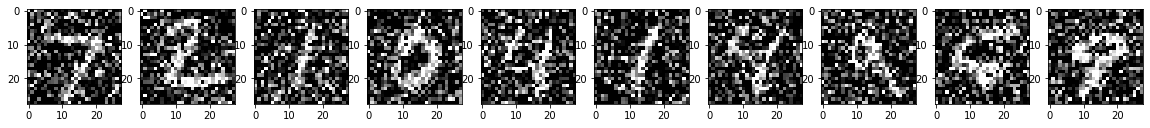

In [20]:
n = 10
plt.figure(figsize = (20, 2))
for i in range(1, n+1):
    sp = plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i-1].reshape(28, 28))
    plt.gray()
plt.show()

# 3. Model

### Architecture

**Encoder**

In [0]:
input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3,3), activation = "relu", padding = "same")(input_img)
x = MaxPool2D((2, 2))(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)

encoded = MaxPool2D((2,2))(x)

**Decoder**

In [0]:
x = Conv2D(32, (3,3), activation = "relu", padding = "same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation = "relu", padding = "same")(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3,3), activation = "sigmoid", padding = "same")(x)

### Execution

**Compilation**

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adadelta',
                   loss = 'binary_crossentropy')

**Local v. Google CoLab execution**

In [24]:
# # Local Execution: 20 epochs
# autoencoder.fit(X_train_noisy, X_train,
#                validation_data = (X_test_noisy, X_test),
#                 verbose = 1,
#                epochs = 20,
#                 batch_size = 128,
#                 shuffle = True)

# Execute on Google Co-Lab: 100 epochs
history = autoencoder.fit(X_train_noisy, X_train, 
                          verbose = 1, 
                          validation_data = (X_test_noisy, X_test), 
                          epochs=100, 
                          batch_size = 128, 
                          shuffle = True) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.1773 - val_loss: 0.1292
Epoch 2/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1190 - val_loss: 0.1096
Epoch 3/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1116 - val_loss: 0.1057
Epoch 4/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1077 - val_loss: 0.1055
Epoch 5/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1053 - val_loss: 0.1022
Epoch 6/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1038 - val_loss: 0.1030
Epoch 7/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1027 - val_loss: 0.1006
Epoch 8/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1019 - val_loss: 0.1014
Epoch 9/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1012 - val_loss: 0.0

### Visualization

**Comparative plots**

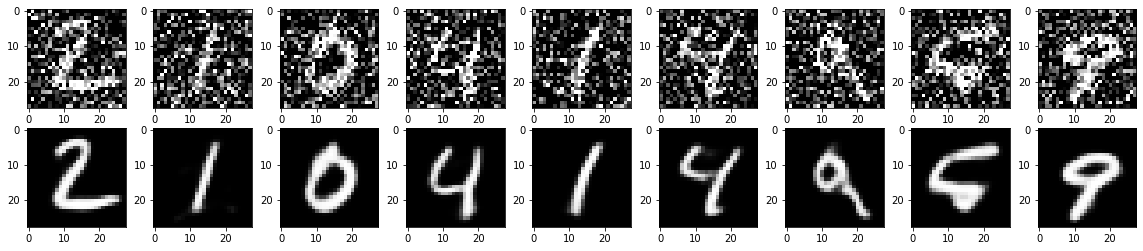

In [37]:
de_noised_images = autoencoder.predict(X_test_noisy[:10])
n = 9
plt.figure(figsize = (20,4))
for i in range(1, n+1):
    plt.subplot(2, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    
    plt.subplot(2, n, n+i) # Move to the next row 
    plt.imshow(de_noised_images[i].reshape(28, 28))
    plt.gray()
plt.savefig("CE_ML_Project_05_01_Images.jpeg")
plt.show()

**Error plots**

In [28]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

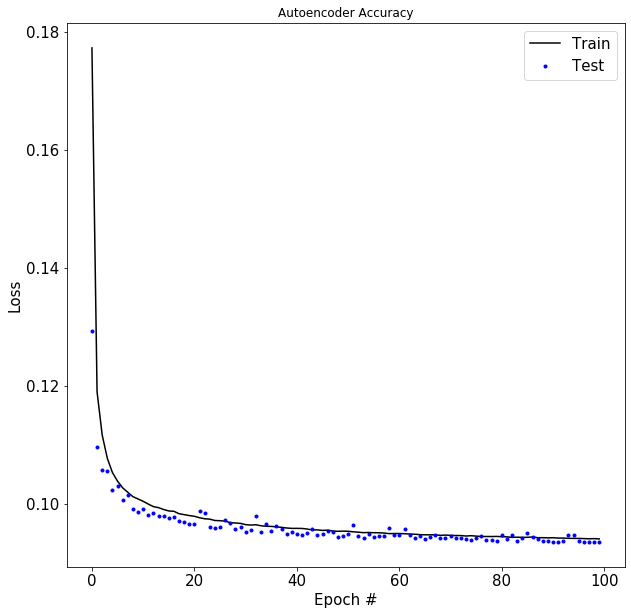

Train - Error in prediction went down from 0.1773 to 0.094
Test  - Error in prediction went down from 0.1292 to 0.0936 



In [38]:
# Plot training & validation accuracy values
plt.figure(figsize = (10,10))
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Autoencoder Accuracy')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch #', fontsize = 15)
plt.legend(['Train', 'Test'], fontsize = 15)#, loc='upper left')
plt.savefig("CE_ML_Project_05_02_Results.jpeg")
plt.show()

v1 = round(history.history['loss'][0], 4)
v2 = round(history.history['loss'][-1], 4)
v3 = round(history.history['val_loss'][0], 4)
v4 = round(history.history['val_loss'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")